In [30]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [31]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/Datasets/"
model_loc = "/content/gdrive/My Drive/Models/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
['heart.csv']


In [32]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

# 1. Data Summary
print("Data Summary:")
print(data.head())
print("\nData Info:")
print(data.info())
print("\nDescriptive Statistics:")
print(data.describe())

# 2. Data Cleaning
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Check for duplicate rows
duplicate_rows = data[data.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)

Data Summary:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      3

In [33]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

The astype() function is used by the code to transform a list of categorical variables in a dataset to the object data type. By clearly designating these variables as categorical, we can make sure that the encoding and analysis procedures handle them correctly.

In [34]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

<ipython-input-34-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-34-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-34-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-34-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-34-76ef3ba0124a>:3: FutureWarning: In a future version, t

In [35]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
##

Shape of x: (303, 21)
Shape of y: (303, 1)


Line 3: y = data['target'].values
This line extracts the values of the column named 'target' from the DataFrame data and assigns them to the variable y.

Line 4: y = y.reshape(y.shape[0],1)
This line reshapes the array y to have a shape of (y.shape[0], 1), converting it from a 1D array to a 2D column vector.

Line 5: x = data.drop(['target'],axis=1)
This line creates a new DataFrame x by dropping the column named 'target' from the original DataFrame data.

In [36]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset:')
print(data)

minx = np.min(data)
maxx = np.max(data)
data_norm = (data - minx) / (maxx - minx)
print('\nNormalized dataset:')
print(data_norm)


Original dataset:
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000

Normalized dataset:
     A    B    C
0  0.0  0.0  0.0
1  0.5  0.5  0.5
2  1.0  1.0  1.0


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [37]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


The heart dataset will first undergo min-max normalization, after which the values of each feature will be scaled to a range of 0 to 1. By ensuring that each feature contributes equally to the analysis, this normalization keeps characteristics with higher magnitudes from taking center stage in the model.

The given code determines each feature in the dataset's minimum and maximum values (x). Next, it uses the min-max normalization formula to scale each feature's value to fall between 0 and 1. Lastly, it uses the head() function to show the first few rows of the normalized dataset.

In conclusion, the heart dataset is ready for additional analysis or modeling as, following min-max normalization, all of its feature values will be scaled to a range between 0 and 1.

In [38]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=0.25, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(181, 21)
(61, 21)
(61, 21)


In [39]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                1408      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1. Input Layer (Dense with 64 neurons and softmax activation):
It processes the input data, converting it into probabilities that sum to 1.
Helps the model understand the input data's distribution.

2. Hidden Layer (Dense with 32 neurons and softmax activation):
It performs further processing on the data, extracting more complex features.
Also converts outputs into probabilities.

3. Output Layer (Dense with 1 neuron and sigmoid activation):
Produces the final prediction or probability value.
Sigmoid activation ensures the output is between 0 and 1, suitable for binary classification tasks.

In [40]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

Loss Function ('mse' - Mean Squared Error):
It measures how far the model's predictions are from the actual values.
For regression tasks, like predicting house prices, we want to minimize this error.

Optimizer (Adam with learning rate 0.01):
It adjusts the model's internal parameters (weights) to minimize the loss.
Adam is a popular optimizer, and the learning rate (0.01) controls how big the updates to the parameters are.
Higher learning rates make bigger updates, but may overshoot the best values. Lower rates take smaller steps but converge more slowly.

Metrics (Accuracy):
It tells us how well the model is doing during training and testing.
Accuracy measures the proportion of correct predictions out of all predictions.
For classification tasks, like identifying images of cats and dogs, we want high accuracy.

In summary, the chosen components of the model compilation affect how the model learns and performs during training:

The loss function guides the model towards the correct predictions by penalizing errors.
The optimizer determines how the model's weights are updated to minimize the loss function.
The choice of metrics provides insight into the model's performance and helps in evaluating its accuracy.

In [41]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
12/12 [==============================] - 1s 22ms/step - loss: 0.2491 - acc: 0.5580 - val_loss: 0.2495 - val_acc: 0.5246
Epoch 2/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2467 - acc: 0.5580 - val_loss: 0.2487 - val_acc: 0.5246
Epoch 3/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2449 - acc: 0.5580 - val_loss: 0.2471 - val_acc: 0.5246
Epoch 4/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2423 - acc: 0.5580 - val_loss: 0.2412 - val_acc: 0.5246
Epoch 5/1000
12/12 [==============================] - 0s 5ms/step - loss: 0.2355 - acc: 0.5580 - val_loss: 0.2335 - val_acc: 0.5246
Epoch 6/1000
12/12 [==============================] - 0s 7ms/step - loss: 0.2260 - acc: 0.5580 - val_loss: 0.2216 - val_acc: 0.5246
Epoch 7/1000
12/12 [==============================] - 0s 6ms/step - loss: 0.2123 - acc: 0.7127 - val_loss: 0.2042 - val_acc: 0.7869
Epoch 8/1000
12/12 [==============================] - 0s 6ms/step - loss: 0

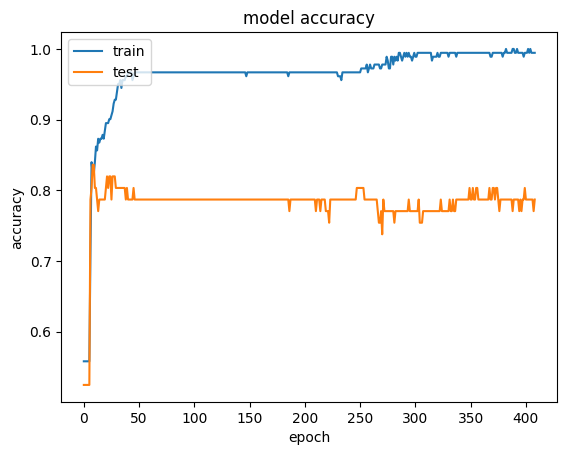

In [42]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

The plot shows how the model's accuracy changes over epochs during training and validation.

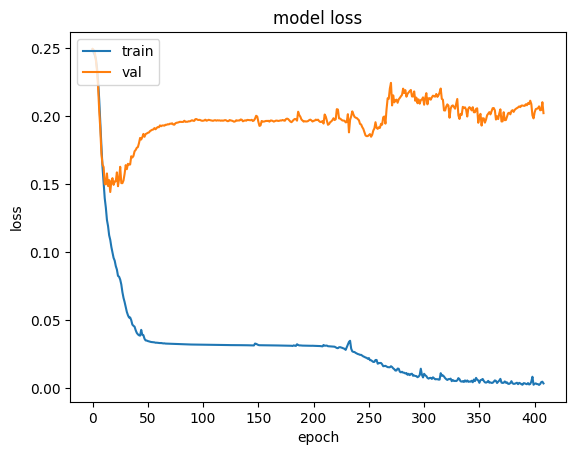

In [43]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.savefig('Loss.png',dpi=100) #to save the image
plt.show()

In [44]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

2/2 [==============================] - 0s 8ms/step - loss: 0.1270 - acc: 0.8689

acc: 86.89%
loss: 0.13


Evaluating the model on the test dataset helps to understand how well it performs on new, unseen data, providing a reliable estimate of its real-world performance.

In [45]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

2/2 [==============================] - 0s 6ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [0]  Result: Fail
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [1] Result: Pass
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

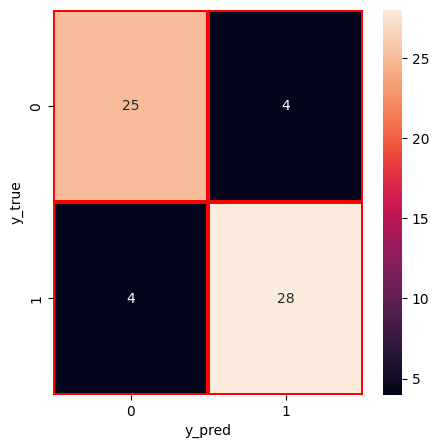


              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [46]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

A confusion matrix is a table used to evaluate the performance of a classification model. It shows the counts of correct and incorrect predictions made by the model. The main components are:

True Positives (TP): Correctly predicted positive cases.
False Positives (FP): Incorrectly predicted positive cases.
False Negatives (FN): Incorrectly predicted negative cases.
True Negatives (TN): Correctly predicted negative cases.




Precision: Proportion of true positive predictions out of all positive predictions.

Recall (or Sensitivity): Proportion of true positive predictions out of all actual positives.

F1-score: Harmonic mean of precision and recall, providing a balanced measure.

Support: Number of actual occurrences of each class.